### B4S1 Tablas de Contingencia

In [1]:
# <!-- collapse=True -->
# importando modulos necesarios
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns 
from pydataset import data

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [2]:
#!pip install pydataset


In [3]:
# importando dataset
titanic = data('titanic')

In [4]:
# ver primeros 10 registros
titanic.head(10)

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes
6,1st class,adults,man,yes
7,1st class,adults,man,yes
8,1st class,adults,man,yes
9,1st class,adults,man,yes
10,1st class,adults,man,yes


# Tablas de frecuencia


## tabla de frecuencia de clases de pasajeros


In [5]:
pd.value_counts(titanic['class'])

3rd class    706
1st class    325
2nd class    285
Name: class, dtype: int64

In [6]:
# tabla de frecuencia relativa de pasajeros
100 * titanic['class'].value_counts() / len(titanic['class'])

3rd class    53.647416
1st class    24.696049
2nd class    21.656535
Name: class, dtype: float64

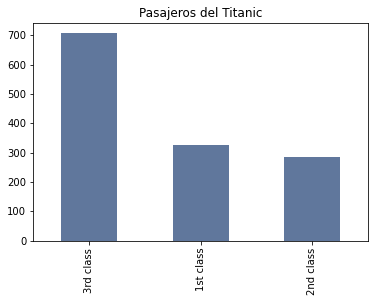

In [7]:
# Gráfico de barras de pasajeros del Titanic
plot = titanic['class'].value_counts().plot(kind='bar',
                                            title='Pasajeros del Titanic')

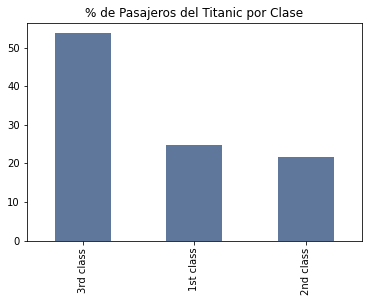

In [8]:
# gráfico de barras de frecuencias relativas.
plot = (100 * titanic['class'].value_counts()/len(titanic['class'])).plot(
    kind='bar', title='% de Pasajeros del Titanic por Clase')

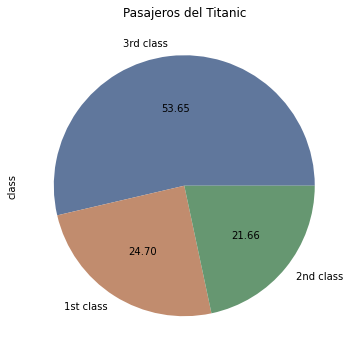

In [9]:
# Gráfico de pastel de pasajeros del Titanic
plot = titanic['class'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Pasajeros del Titanic')

In [10]:
# Tabla de contingencia class / survived
pd.crosstab(index=titanic['survived'],
            columns=titanic['class'], margins=True)

class,1st class,2nd class,3rd class,All
survived,,,,
no,122,167,528,817
yes,203,118,178,499
All,325,285,706,1316


In [11]:
# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=titanic['survived'], columns=titanic['sex'],
            margins=True).apply(lambda r: r/len(titanic) *100,
                                axis=1)

sex,man,women,All
survived,,,
no,52.735562,9.346505,62.082067
yes,13.297872,24.620061,37.917933
All,66.033435,33.966565,100.000000


In [12]:
# tabla de contingencia en porcentajes relativos segun sobreviviente
pd.crosstab(index=titanic['survived'], columns=titanic['class']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

class,1st class,2nd class,3rd class
survived,,,
no,14.932681,20.440636,64.626683
yes,40.681363,23.647295,35.671343


In [13]:
# tabla de contingencia en porcentajes relativos segun clase
pd.crosstab(index=titanic['survived'], columns=titanic['class']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

class,1st class,2nd class,3rd class
survived,,,
no,37.538462,58.596491,74.787535
yes,62.461538,41.403509,25.212465


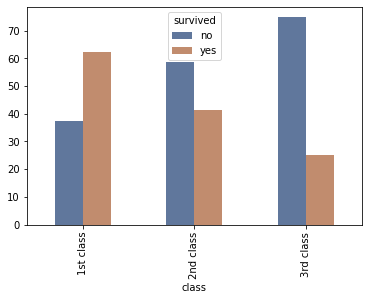

In [14]:
# Gráfico de barras de sobreviviviente segun clase
plot = pd.crosstab(index=titanic['class'],
            columns=titanic['survived']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

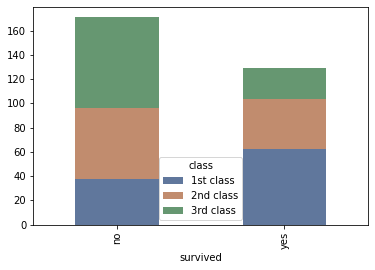

In [15]:
# Gráfico de barras de sobreviviviente segun clase
plot = pd.crosstab(index=titanic['survived'],
            columns=titanic['class']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

In [16]:
# Prueba de Chi-cuadrada
from scipy.stats import chisquare
tabla=pd.crosstab(index=titanic['survived'], columns=titanic['class'])
chisquare(tabla)

Power_divergenceResult(statistic=array([ 20.18769231,   8.4245614 , 173.51274788]), pvalue=array([7.02031714e-06, 3.70185931e-03, 1.26471311e-39]))